# Multiplicative Ciphers

So far we've looked at substitution ciphers that create mappings between plaintext and ciphertext alphabets using either keywords or addition by an integer key. Let's see what happens when we try to use multiplication to create a mapping.

Let's go through letter by letter with a multiplicative key of `4`

```
 plaintext:  a   b   c   d  ...  i   j 
 numerical:  0   1   2   3  ...  8   9
        x4:  0   4   8  12  ... 32  36
    MOD 26:  0   4   8  12  ...  6  10
ciphertext:  A   E   I   M  ...  G   K
```
So far so good, but can you predict why this may not keep working?

```
 plaintext:  a   b   c   d  ...  i   j  ...  n   o
 numerical:  0   1   2   3  ...  8   9  ... 13  14
        x4:  0   4   8  12  ... 32  36  ... 52  56
    MOD 26:  0   4   8  12  ...  6  10  ...  0   4
ciphertext:  A   E   I   M  ...  G   K  ...  A   E
```
When we get to the plaintext letters of `n` and `o`, they get mapped to `A` and `E`. These ciphertext letters were already mapped to the plaintext letters of `a` and `b`! This is a critical flaw in this process. If you knew the key was `4` and you had a ciphertext letter of `E`, there's no way to determine if the `E` is from a plaintext letter of `b` or `o`. This indicates that `4` is an invalid multiplicative key, and should not be used.

## Valid Multiplicative Keys
We've already determined that we can't use `4` to create a multiplicative cipher, but are there other values that would work? Let's look at plaintext and ciphertext mappings generated using a variety of key values.

In [1]:
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
print( 'plaintext:', LETTERS.lower() )

for key in range(0,30):
    cipheralphabet = ''
    for position in range(0, 26):
        cipheralphabet += LETTERS[ (position * key) % 26 ]
    
    if cipheralphabet.count('A') > 1:
        test = ''
    else:
        test = 'valid'
    print('   key {}: {} {}'.format(str(key).zfill(2),cipheralphabet, test) )

plaintext: abcdefghijklmnopqrstuvwxyz
   key 00: AAAAAAAAAAAAAAAAAAAAAAAAAA 
   key 01: ABCDEFGHIJKLMNOPQRSTUVWXYZ valid
   key 02: ACEGIKMOQSUWYACEGIKMOQSUWY 
   key 03: ADGJMPSVYBEHKNQTWZCFILORUX valid
   key 04: AEIMQUYCGKOSWAEIMQUYCGKOSW 
   key 05: AFKPUZEJOTYDINSXCHMRWBGLQV valid
   key 06: AGMSYEKQWCIOUAGMSYEKQWCIOU 
   key 07: AHOVCJQXELSZGNUBIPWDKRYFMT valid
   key 08: AIQYGOWEMUCKSAIQYGOWEMUCKS 
   key 09: AJSBKTCLUDMVENWFOXGPYHQZIR valid
   key 10: AKUEOYISCMWGQAKUEOYISCMWGQ 
   key 11: ALWHSDOZKVGRCNYJUFQBMXITEP valid
   key 12: AMYKWIUGSEQCOAMYKWIUGSEQCO 
   key 13: ANANANANANANANANANANANANAN 
   key 14: AOCQESGUIWKYMAOCQESGUIWKYM 
   key 15: APETIXMBQFUJYNCRGVKZODSHWL valid
   key 16: AQGWMCSIYOEUKAQGWMCSIYOEUK 
   key 17: ARIZQHYPGXOFWNEVMDULCTKBSJ valid
   key 18: ASKCUMEWOGYQIASKCUMEWOGYQI 
   key 19: ATMFYRKDWPIBUNGZSLEXQJCVOH valid
   key 20: AUOICWQKEYSMGAUOICWQKEYSMG 
   key 21: AVQLGBWRMHCXSNIDYTOJEZUPKF valid
   key 22: AWSOKGCYUQMIEAWSOKGCYUQMIE 
   key 23: AXUR

We can see parse through all these different plaintext and ciphertext mappings and see a few things:
* A key of 0 isn't valid or helpful, since every plaintext letter value multiplied by 0 will be 0, resulting in a ciphertext letter of `A`
* A key of 1 is valid, but not very helpful since the plaintext and ciphertext alphabets are identical.
* Keys with even valued keys are all invalid.
* A key of 13 is invalid.
* All keys result in plaintext `a` being mapped to ciphertext `A`.
* Key 26 produces the same ciphertext alphabet as Key 00, Key 27 the same as Key 01, Key 28 the same as Key 02, and so on.

That leaves valid keys of `1, 3, 5, 7, 9, 11, 15, 17, 19, 21, 23`. These numbers all have one thing in common: they are co-prime with $26$.

> Two integers $a$ and $b$ are said to be __relatively prime__, __mutually prime__, or __co-prime__ if the only positive integer (factor) that divides both of them is $1$. That is, the only common factor (or divisor) is $1$.

If we had a larger or smaller alphabet we could use other key values that would be co-prime with the size of those alphabets. For example, the Spanish alphabet has $27$ letters, which means that the integers `1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23,` and `25` are valid keys. The Swedish alphabet has $29$ letters, and since $29$ is prime and by definition shares only the factor $1$ with all other numbers, all numbers between `0 - 28` are valid multiplicative keys. By comparison having a $26$ letter alphabet is fairly limiting if you wish to use a multiplicative cipher.

## A Graphical Interpretation
Another way to think about the multiplicative cipher is we're plotting points with integer values on the line $C = k \cdot P$, where $C$ is the $y$-value on a graph that represents the numerical value of the ciphertext letter, $k$ is the multiplicative key, and $P$ is the $x$-value on the graph that represents the numerical value of the plaintext letter. We'll $\text{MOD}$ the value of $C$ by $26$ before plotting to ensure that all values of $C$ correspond to a letter in our alphabet.

For example, if $k=3$:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

def f(P, k):
    return (P*k)%26

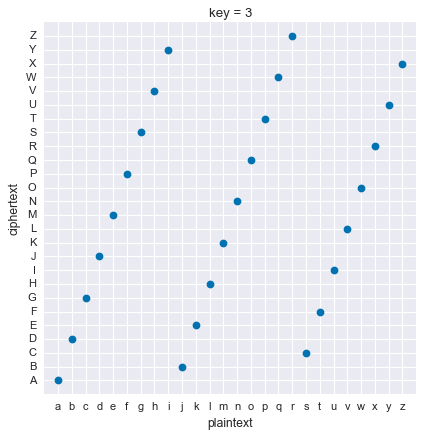

In [26]:
t1 = np.arange(0, 26, 1)
plt.xticks(np.arange(26), ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.yticks(np.arange(26), ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H','I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'))
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-1, 26, -1, 26])
plt.xlabel('plaintext')
plt.ylabel('ciphertext')
plt.title('key = 3')
plt.rcParams["figure.figsize"] = (6,6)

plt.plot(t1, f(t1, 3), 'o')

plt.show()

We can visually inspect the plot to see that every plaintext letter is mapped to a ciphertext letter, and that relationship is one-to-one, meaning that each  plaintext letter is mapped to only one ciphertext letter, and vice-versa. That means that, for a key of $3$ the plaintext to ciphertext transformation is a function, and that function has an inverse that is also a function.

Now let's look at an invalid key:

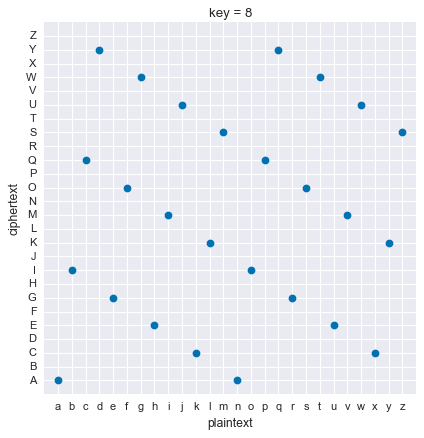

In [27]:
t1 = np.arange(0, 26, 1)
plt.xticks(np.arange(26), ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.yticks(np.arange(26), ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H','I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'))
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-1, 26, -1, 26])
plt.xlabel('plaintext')
plt.ylabel('ciphertext')
plt.title('key = 8')
plt.rcParams["figure.figsize"] = (6,6)

plt.plot(t1, f(t1, 8), 'o')

plt.show()

Here we can see some plaintext letters get mapped to the same ciphertext letter, `k` and `x` are both mapped to `C` for example. Here's a very extreme case:

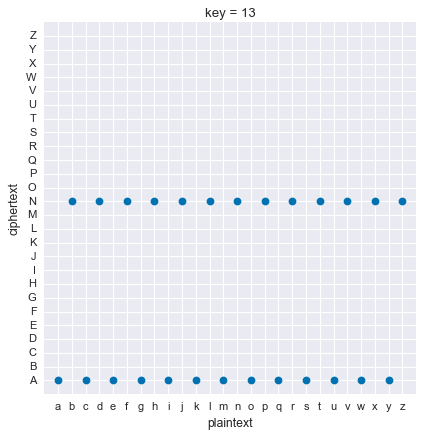

In [28]:
t1 = np.arange(0, 26, 1)
plt.xticks(np.arange(26), ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.yticks(np.arange(26), ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H','I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'))
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-1, 26, -1, 26])
plt.xlabel('plaintext')
plt.ylabel('ciphertext')
plt.title('key = 13')
plt.rcParams["figure.figsize"] = (6,6)

plt.plot(t1, f(t1, 13), 'o')

plt.show()

A key of $13$ maps half the plaintext letters to `A` and the other half to `N`

## Exercise for the Reader
Can you write a Python program similar to the Caesar Cipher program that can encipher a message using the multiplicative cipher?

## Deciphering Multiplicative Ciphers

Suppose you intercepted a message that you suspect was encrypted using a multiplicative cipher, and you even think you know the key. How would you go about deciphering the message? If the first ciphertext letter was D, and the key was 4, how do you undo the enciphering process? Based on what we've seen with the Caesar Cipher, it would be tempting to undo the multiplication by the key with division by the key. Let's see what happens

```
ciphertext:  A   B   C   D  ...    N    O
 numerical:  0   1   2   3  ...   13   14
        ÷4:  0 .25 .50 .25  ... 3.25 3.50
    MOD 26:  0   4   8  12  ...    6   10
 plaintext:  a   ?   ?   ?  ...    ?    ?
```

While we have no problem performing the division of two integers, the result is a float value that doesn't correspond back to a letter in our alphabet. We'll need another approach here for deciphering these messages.

### More Modular Arithmetic
Think back to a course you had that discussed solving linear equations. For example:

$$ 3x + 1 = 7$$

You could solve this by:
* Subtract $1$ to both sides
* Dividing both sides by $3$

$$
\begin{align}
    3x + 1 &= 7 \\
    3x &= 6 \\
    x &= 2
\end{align}
$$

But, you've also learned another way to describe this process:
* Add the *additive inverse* of 1 to both sides
* Multiply both sides by the *multiplicative inverse*

Let's define these terms and see how they may be helpful in deciphering our multiplicative cipher:
> Additive Inverse: Integers $a$ and $b$ are additive inverses if and only if $a + b = 0$

> Multiplicative Inverse: Integers $a$ and $b$ are multiplicative inverses if and only if $a \cdot b = 1$

When working in a certain modulo, $n$, we're restricted to using the integers of $0, 1, 2, 3..., n - 1$. We call this set of integers $\mathbb{Z}_n$. For example, when working in modulo $7$, we only have the integers $0, 1, 2, 3, 4, 5$, and $6$, as any other integer has a congruence in this set. As we've mentioned before, since the set of numbers $\{..., -6, 1, 8, 15, ...\}$ are all congruent to one, we call $[1]$ the congruence class or equivalence class of $1$ modulo $7$, which consists of all these integers.

### Additive Inverses
Suppose we define a new operation, $+_4$, that adds two integers and then MODS by 4. Organizing the results in a table, where you add the number in the top row with the number in the first column would yield:

$$
\begin{array}{c|cccc}
 +_4 & 0 & 1 & 2 & 3 \\ \hline
   0 & 0 & 1 & 2 & 3 \\
   1 & 1 & 2 & 3 & 0 \\
   2 & 2 & 3 & 0 & 1 \\
   3 & 3 & 0 & 1 & 2
\end{array}
$$

You probably can find a lot of patterns in the tables above, but let's talk about all those zeros. When working with all integers, the only way to get two numbers to sum to zero is to add a number and it's opposite. For example, $3$ and $-3$, or $12$ and $-12$, etc. However, as you can see when working modulo 4, $3$ and $1$ sum to $0$ so we can consider them *additive inverses*. Likewise, $2$ is its own additive inverse since $0 \equiv 2 + 2 \pmod{4}$. Boxing each of the elements in the table results in the following:

$$
\begin{array}{c|cccc}
 +_4 & 0 & 1 & 2 & 3 \\ \hline
   0 & 0 & 1 & 2 & 3 \\
   1 & 1 & 2 & 3 & \boxed{0} \\
   2 & 2 & 3 & \boxed{0} & 1 \\
   3 & 3 & \boxed{0} & 1 & 2
\end{array}
$$

### Multiplicative Inverses
Now suppose we define a new operation, $\times_n$, that multiplies two integers and then MODS by $n$. Organized in a table in a similar manner as before, the results would look as follows:

For $\times_4$,

$$
\begin{array}{c|cccc}
 \times_4 & 0 & 1 & 2 & 3 \\ \hline
        0 & 0 & 0 & 0 & 0 \\
        1 & 0 & 1 & 2 & 3 \\
        2 & 0 & 2 & 0 & 2 \\
        3 & 0 & 3 & 2 & 1
\end{array}
$$

Here you can see that $1$ and $3$ are their own multiplicative inverses because $1 \equiv 1 \cdot 1 \pmod{4}$ and $1 \equiv 3 \cdot 3 \pmod{4}$.

$$
\begin{array}{c|cccc}
 \times_4 & 0 & 1 & 2 & 3 \\ \hline
        0 & 0 & 0 & 0 & 0 \\
        1 & 0 & \boxed{1} & 2 & 3 \\
        2 & 0 & 2 & 0 & 2 \\
        3 & 0 & 3 & 2 & \boxed{1}
\end{array}
$$

For $\times_6$,

$$
\begin{array}{c|cccccc}
 \times_6 & 0 & 1 & 2 & 3 & 4 & 5 \\ \hline
        0 & 0 & 0 & 0 & 0 & 0 & 0 \\
        1 & 0 & 1 & 2 & 3 & 4 & 5 \\
        2 & 0 & 2 & 4 & 0 & 2 & 4 \\
        3 & 0 & 3 & 0 & 3 & 0 & 3 \\
        4 & 0 & 4 & 2 & 0 & 4 & 2 \\
        5 & 0 & 5 & 4 & 3 & 2 & 1
\end{array}
$$

Here you can see that $1$ and $5$ are their own multiplicative inverses because $1 \equiv 1 \cdot 1 \pmod{6}$ and $1 \equiv 5 \cdot 5 \pmod{6}$.

$$
\begin{array}{c|cccccc}
 \times_6 & 0 & 1 & 2 & 3 & 4 & 5 \\ \hline
        0 & 0 & 0 & 0 & 0 & 0 & 0 \\
        1 & 0 & \boxed{1} & 2 & 3 & 4 & 5 \\
        2 & 0 & 2 & 4 & 0 & 2 & 4 \\
        3 & 0 & 3 & 0 & 3 & 0 & 3 \\
        4 & 0 & 4 & 2 & 0 & 4 & 2 \\
        5 & 0 & 5 & 4 & 3 & 2 & \boxed{1}
\end{array}
$$

Lastly, $\times_7$:

$$
\begin{array}{c|cccccc}
 \times_7 & 0 & 1 & 2 & 3 & 4 & 5 & 6 \\ \hline
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
        1 & 0 & 1 & 2 & 3 & 4 & 5 & 6 \\
        2 & 0 & 2 & 4 & 6 & 1 & 3 & 5 \\
        3 & 0 & 3 & 6 & 2 & 5 & 1 & 4 \\
        4 & 0 & 4 & 1 & 5 & 2 & 6 & 3 \\
        5 & 0 & 5 & 3 & 1 & 6 & 4 & 2 \\
        6 & 0 & 6 & 5 & 4 & 3 & 2 & 1
\end{array}
$$

Here there are many multiplicative inverses! In fact, every non-zero number has an inverse! $1$ and $6$ are their own multiplicative inverses, $2$ and $4$ are multiplicative inverses, and $3$ and $5$ are multiplicative inverses.

$$
\begin{array}{c|cccccc}
 \times_7 & 0 & 1 & 2 & 3 & 4 & 5 & 6 \\ \hline
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
        1 & 0 & \boxed{1} & 2 & 3 & 4 & 5 & 6 \\
        2 & 0 & 2 & 4 & 6 & \boxed{1} & 3 & 5 \\
        3 & 0 & 3 & 6 & 2 & 5 & \boxed{1} & 4 \\
        4 & 0 & 4 & \boxed{1} & 5 & 2 & 6 & 3 \\
        5 & 0 & 5 & 3 & \boxed{1} & 6 & 4 & 2 \\
        6 & 0 & 6 & 5 & 4 & 3 & 2 & \boxed{1}
\end{array}
$$

## Using Multiplicative Inverses
Since we are working in modulo 26, we'll need to figure out which key values have a multiplicative inverses. Let's write a Python program to check them all for us. We can construct a loop to try all the values between 0 and 26 and see if there's a number that when multiplied and then reduced mod 26 results in a product of $1$

In [5]:
for i in range(0,26):
    for j in range(0,26):
        if (i * j) %26 == 1:
            print (i, j)

1 1
3 9
5 21
7 15
9 3
11 19
15 7
17 23
19 11
21 5
23 17
25 25


We can see that $1$ is its own multiplicative inverse, $3$ and $9$ are multiplicative inverses, $5$ and $21$, etc. In fact, we can see that all the valid keys are in the list, paired with their multiplicative inverse. __Every valid multiplicative key will have a multiplicative inverse__. Let's see how this fact will be helpful to us.

Suppose we encipher the plaintext alphabet with multiplicative key of 5:

```
 plaintext:  a   b   c   d  ...  i   j 
 numerical:  0   1   2   3  ...  8   9
        x5:  0   5  10  15  ... 40  45
    MOD 26:  0   5  10  15  ... 14  19
ciphertext:  A   F   K   P  ...  O   T
```

Now, deciphering these same letters, only instead of dividing by $5$ to decipher, we'll multiply by the multiplicative inverse of $5$, which we now know is $21$ in modulo $26$.

```
ciphertext:  A    F    K    P  ...    O    T
 numerical:  0    5   10   15  ...   14   19
       x21:  0  105  210  315  ...  294  399
    MOD 26:  0    1    2    3  ...    8    9
 plaintext:  a    b    c    d  ...    i    j
```

It worked!

## Exercise for the Reader
Can you write Python code that will decipher a Multiplicative Cipher?

In [1]:
def multcipher(text, mkey):
    text = text.upper().replace(' ','')
    LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    ciphertext = ''
    
    for char in text:
        ciphertext += LETTERS[ (mkey* LETTERS.find(char)) % 26 ]
    
    return ciphertext